In [0]:
#impport libraries
import pandas as pd
import matplotlib.pyplot as pt
import numpy as nm

*** No CODEPAGE record, no encoding_override: will use 'ascii'
           X          Y
0  20.000000  88.599998
1  16.000000  71.599998
2  19.799999  93.300003
3  18.400000  84.300003
4  17.100000  80.599998


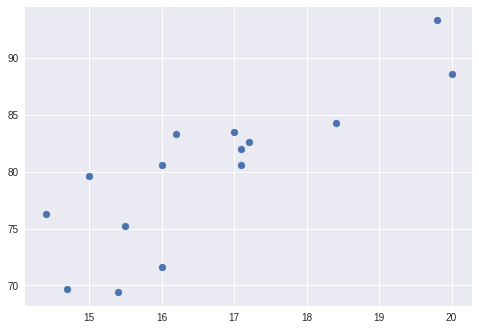

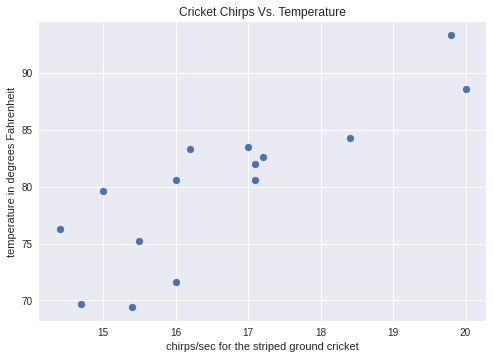

In [52]:
#Reading Excel data
df = pd.read_excel("slr02.xls")
#Data in file slr02.xls
X=df.iloc[:,0]
Y=df.iloc[:,1]
print(df.head())
#plotting graph for given data
pt.style.use('seaborn')
pt.scatter(X,Y)
pt.show()
#plotting graph for given data with labels
pt.scatter(X,Y,)
pt.title("Cricket Chirps Vs. Temperature")
pt.xlabel("chirps/sec for the striped ground cricket")
pt.ylabel("temperature in degrees Fahrenheit")
pt.show()



---



**Using Ordinary Least Square method(OLS)**

In [53]:
#Finding mean of Y
s=sum(Y)
n=len(Y)
y_mean=s/n
print(y_mean)
#Finding mean of X
x_mean=nm.mean(X)
print(x_mean)

80.03999989666664
16.653333345999997


In [54]:
#Finding slope and c values and new 'Y' values
m_num=0
m_den=0
for i in range(len(Y)):
  m_num+=((X[i]-x_mean)*(Y[i]-y_mean))
  m_den+=(X[i]-x_mean)**2
#print(m_num, m_den)
m=(m_num/m_den)
print("Slope=",m)
b=(y_mean-(m*x_mean))
print("c=",b)
print("The new line equation is Y=",round(m,2),"*X +",round(b,2))
Y_new=(m*X)+b

Slope= 3.2910945679475643
c= 25.23230498342602
The new line equation is Y= 3.29 *X + 25.23


In [55]:
#Finding error rate before regression
error=0
error_after=0
for i in range(len(Y)):
  error+=((Y[i]-y_mean)**2)
  error_after+=(Y_new[i]-y_mean)**2
print(error)
print(error_after)

629.8361537020724
439.2887642786014


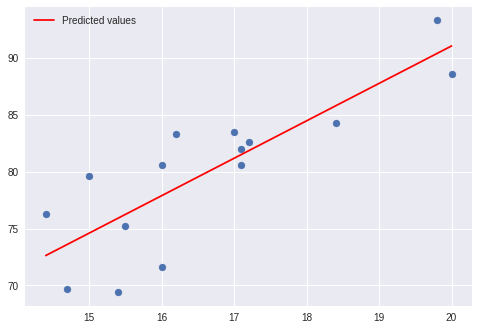

In [56]:
#Plotting old values as well as new values
pt.scatter(X,Y)
pt.plot([min(X), max(X)], [min(Y_new), max(Y_new)], color='red',label="Predicted values")
pt.legend()
pt.show()



---



**R square value for OLS method**

In [57]:
#Finding R square values
R_square=(error_after/error)*100
#print(R_square)
print("R^2 value is =",R_square,"%")

R^2 value is = 69.74651450167396 %




---



**Gradient Descent Algorithm**

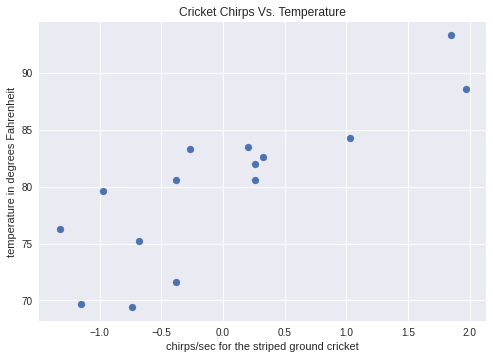

In [59]:
sd_x=X.std()
x=(X-x_mean)/sd_x
pt.scatter(x,Y)
pt.title("Cricket Chirps Vs. Temperature")
pt.xlabel("chirps/sec for the striped ground cricket")
pt.ylabel("temperature in degrees Fahrenheit")
pt.show()

In [0]:
def hypothesis(x,theta):
    y_new = theta[0] + theta[1]*x
    return y_new
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = nm.zeros((2,))
    for i in range(m):
        x = X[i]
        y_new = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_new - y)
        grad[1] += (y_new - y)*x
    return grad/m
def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_new = hypothesis(X[i],theta)
        total_error += (y_new - Y[i])**2
        
    return (total_error/m)
def gradientDescent(X,Y,max_steps=500,learning_rate =0.1):
    
    theta = nm.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

In [61]:
theta,error_list,theta_list = gradientDescent(x,Y)
print(theta)
print(error_list)

[80.0399999   5.60158628]
[6448.390660371871, 5225.962767775007, 4235.733404044372, 3433.596019095007, 2783.822319523428, 2257.4707535843636, 1831.0973210708123, 1485.7112775682858, 1205.9292123610821, 979.2898165668905, 795.6988165793426, 646.9793465256023, 526.5077305313819, 428.91845038687364, 349.8651562291438, 285.82707440389004, 233.95218896279547, 191.93021138430134, 157.88968005301598, 130.31460591036065, 107.97695138082086, 89.88193497229791, 75.22372526505838, 63.34955079256989, 53.730627195204654, 45.938606694142365, 39.62650091523378, 34.513227348775665, 30.371091137234, 27.015644628922722, 24.297473045675194, 22.095540404427414, 20.311799327972924, 18.86682467458866, 17.696276517373573, 16.74803494323987, 15.979879063954238, 15.357606870285208, 14.853512194833048, 14.445150954074945, 14.114341723987147, 13.846356140177653, 13.629263067639489, 13.453397333569258, 13.310929364219751, 13.195516560556714, 13.102020887719844, 13.026280102082701, 12.964922428398227, 12.915216434

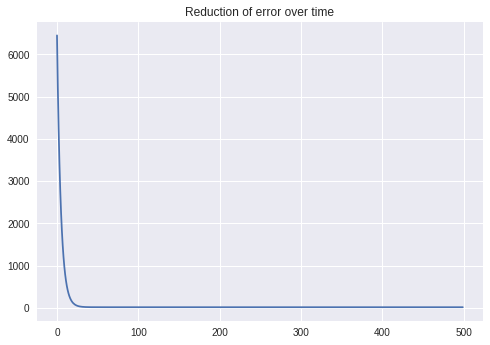

In [62]:
pt.plot(error_list)
pt.title("Reduction of error over time")
pt.show()

In [63]:
y_new=hypothesis(x,theta)
print(y_new)

0     91.054196
1     77.889818
2     90.395975
3     85.788444
4     81.510023
5     76.244271
6     73.611395
7     81.510023
8     75.915160
9     78.548039
10    74.598724
11    81.839134
12    77.889818
13    81.180913
14    72.624066
Name: X, dtype: float64


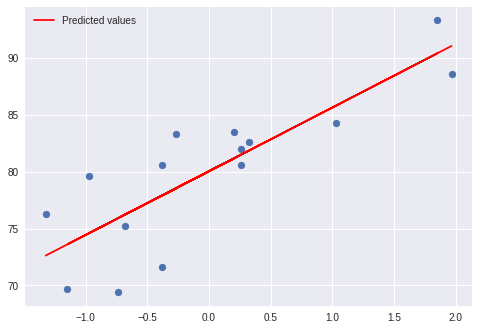

In [64]:
pt.scatter(x,Y)
pt.plot(x,y_new,color='red',label="Predicted values")
pt.legend()
pt.show()



---



**R square value for Gradient Descent algorithm**

In [65]:
error_g=0
error_after_g=0
for i in range(len(Y)):
  error_g+=((Y[i]-y_mean)**2)
  error_after_g+=(y_new[i]-y_mean)**2
#print(error_g)
#print(error_after_g)
#Finding R square values
R_square_g=(error_after_g/error_g)*100
print("R^2 value is =",R_square_g,"%")

R^2 value is = 69.74651450167387 %
